<a href="https://colab.research.google.com/github/TheVioletRaven/NSE_OU/blob/master/Casus_Open_Universiteit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Notebook gemaakt door: Aukje Reina van Montfort (1704095)***

#Installatie van Anaconda en NumPy

##Anaconda package install

> Anaconda is een open-source distributie van Python voor wetenschappelijk rekenen. Het bevat veelgebruikte tools voor datawetenschap, zoals Jupyter, pandas, numpy, scikit-learn, matplotlib, en meer. Deze installatie vindt enkel plaats in het EDA notebook en dient meer als illustratie dat het gedaan moet worden voorafgaand de Jupyter Notebooks van PI7.



In [ ]:
#!pip install -q condacolab
#import condacolab
#condacolab.install()

# Controle Anaconda package install en versie
#!conda --version

##Panda Numpy install

> NumPy (Numerical Python) is een fundamentele bibliotheek voor wetenschappelijk rekenen met Python. Het biedt ondersteuning voor grote, multi-dimensionale arrays en matrices, samen met een verzameling wiskundige functies om met deze arrays te werken. Wederom vindt deze installatie enkel plaats in het EDA notebook.







In [ ]:
#!conda install pandas numpy matplotlib

#EDA Notebook
Eerste blik op de data

## Library imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import unittest
from itertools import combinations # wordt gebruikt voor unieke combinaties binnen de "for science" spreidingstabel, een mooi kunstwerk op zich.
import seaborn as sns # wordt gebruikt voor de spreidingstabel matrix
from sklearn.decomposition import PCA # wordt gebruikt voor dimensie reductie (data preparatie)
from sklearn.preprocessing import StandardScaler # wordt gebruikt voor data preparatie
from scipy.stats import zscore # Wordt gebruikt in lesweek 2 om outliers te verwijderen (data preparatie)
from sklearn.cluster import KMeans # Voor clusteranalyse

## Importeren van de csv file

**Belangrijke informatie NSE dataset:**

De dataset is in week 7 van blokperiode 4 geleverd door Mattie Hermans van de Open Universiteit te Heerlen. Gevoelige informatie staat aangekaart middels een negatief cijfer (zoals -4) en de data is mede interpreteerbaar middels het "NSE2024_Bestandsbeschrijving_definitief_Instellingsbestand.xlsx."


> *Notitie: De datasets worden ingeladen middels de persoonlijke Google Drive van de studenten. Deze datasets zullen worden meegestuurd met het Jupyter notebook. Ook wordt er een demovideo uitgereikt.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Pad naar de datasets
NSE_bestand_OU = "/content/drive/MyDrive/Colab Notebooks/Dataset/NSE_Instellingsbestand_2024.csv"
df = pd.read_csv(NSE_bestand_OU, delimiter=';', skiprows=4)

# verwijder rijen met negatieve waarden
df = df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and x < 0 else x)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Weergeven data types van de kolommen
print("Data Types:")
print(df.dtypes)

Data Types:
20240050060            int64
2024                   int64
1.9767               float64
22NC                  object
Open Universiteit     object
                      ...   
3.18                   int64
5                      int64
-3.71                  int64
1.6                    int64
0.17                   int64
Length: 369, dtype: object


In [ ]:
# Print een gedeelte van de data om de structuur te verifiëren
print("\nData Sample:")
print(df.head())


Data Sample:
Empty DataFrame
Columns: [20240050060, 2024, 1.9767, 22NC, Open Universiteit, 22NC.1, Open Universiteit.1, 50645, B Bedrijfskunde, 50645.1, B Bedrijfskunde.1, Afstandsonderwijs, 6, Economie, 99, 99.1, 2, 1, -2, -2.1, -2.2, 0, 0.1, 1.1, 2.1, 2.2, 1.2, 5-Mar-24, Unnamed: 28, Unnamed: 29, Unnamed: 30, Unnamed: 31, Unnamed: 32, Unnamed: 33, Unnamed: 34, Unnamed: 35, 1.3, -4, 0.2, -4.1, -4.2, -4.3, -4.4, -4.5, -4.6, -4.7, 4, 4.1, 3, -1, 3.1, 4.2, 4.3, 3.2, 4.4, 3.3, 4.5, 3.4, 4.6, 4.00, 4.7, 4.8, 4.9, 4.10, 4.11, 4.12, 4.13, 4.14, 4.15, 4.00.1, 4.16, -2.3, 3.88, 4.17, 4.18, 4.19, 3.5, 4.20, 4.21, 4.22, 4.23, 4.24, -3, 4.00.2, 4.25, 4.26, 4.00.3, 4.27, 4.28, 4.29, 4.30, 4.31, 4.32, 3.78, 4.33, 4.34, 4.35, 4.36, 4.37, 3.6, ...]
Index: []

[0 rows x 369 columns]


In [ ]:
# Controle dat er geen negatieve waarden meer zijn
negative_values_exist = (df[numeric_columns] < 0).any().any()
print("\nAre there any negative values left in numeric columns?", negative_values_exist)


Are there any negative values left in numeric columns? False


In [ ]:
# Functie om statistieken te berekenen
def calculate_stats(column):
    return [
        column.var(),
        column.std(),
        column.mean(),
        column.median(),
        column.mode()[0] if not column.mode().empty else None
    ]

# Selecteer numerieke kolommen
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
print("\nNumeric Columns:", numeric_columns)


Numeric Columns: ['20240050060', '2024', '1.9767', '50645', '50645.1', '6', '99', '99.1', '2', '1', '-2', '-2.1', '-2.2', '0', '0.1', '1.1', '2.1', '2.2', '1.2', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', '1.3', '-4', '0.2', '-4.1', '-4.2', '-4.3', '-4.4', '-4.5', '-4.6', '-4.7', '4', '4.1', '3', '-1', '3.1', '4.2', '4.3', '3.2', '4.4', '3.3', '4.5', '3.4', '4.6', '4.00', '4.7', '4.8', '4.9', '4.10', '4.11', '4.12', '4.13', '4.14', '4.15', '4.00.1', '4.16', '-2.3', '3.88', '4.17', '4.18', '4.19', '3.5', '4.20', '4.21', '4.22', '4.23', '4.24', '-3', '4.00.2', '4.25', '4.26', '4.00.3', '4.27', '4.28', '4.29', '4.30', '4.31', '4.32', '3.78', '4.33', '4.34', '4.35', '4.36', '4.37', '3.6', '4.38', '4.39', '3.7', '1.4', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14', '0.15', '1.5', '0.16', '-1.1', '-1.2', '-1.3', '-1.4', '-1.5', '-1.6', '-1.7', '-1.8', '-1.9', '-1.10', '-1.1

In [ ]:
# Dictionary om statistieken op te slaan
stats = {col: calculate_stats(df[col]) for col in numeric_columns}

# Weergeven van de statistieken
for col, stat in stats.items():
    print(f"{col} Stats: {stat}")

20240050060 Stats: [nan, nan, nan, nan, None]
2024 Stats: [nan, nan, nan, nan, None]
1.9767 Stats: [nan, nan, nan, nan, None]
50645 Stats: [nan, nan, nan, nan, None]
50645.1 Stats: [nan, nan, nan, nan, None]
6 Stats: [nan, nan, nan, nan, None]
99 Stats: [nan, nan, nan, nan, None]
99.1 Stats: [nan, nan, nan, nan, None]
2 Stats: [nan, nan, nan, nan, None]
1 Stats: [nan, nan, nan, nan, None]
-2 Stats: [nan, nan, nan, nan, None]
-2.1 Stats: [nan, nan, nan, nan, None]
-2.2 Stats: [nan, nan, nan, nan, None]
0 Stats: [nan, nan, nan, nan, None]
0.1 Stats: [nan, nan, nan, nan, None]
1.1 Stats: [nan, nan, nan, nan, None]
2.1 Stats: [nan, nan, nan, nan, None]
2.2 Stats: [nan, nan, nan, nan, None]
1.2 Stats: [nan, nan, nan, nan, None]
Unnamed: 28 Stats: [nan, nan, nan, nan, None]
Unnamed: 29 Stats: [nan, nan, nan, nan, None]
Unnamed: 30 Stats: [nan, nan, nan, nan, None]
Unnamed: 31 Stats: [nan, nan, nan, nan, None]
Unnamed: 32 Stats: [nan, nan, nan, nan, None]
Unnamed: 33 Stats: [nan, nan, nan, na

Vervolgens is de Seaborn library toegepast om een spreidingstabel matrix aan te maken. Deze matrix maakt het makkelijker om de correlaties te visualiseren door een grid van plots te maken. De Seaborn library is ook sneller dan de matplotlibrary omdat matplotlibrary elke grid zelf moet invullen.

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(df)

In [ ]:
# Sample the data (e.g., 5% of the original data)
sampled_df = df.sample(frac=0.05, random_state=42)

sns.set_theme(style="ticks")
sns.pairplot(sampled_df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reload the CSV file correctly, skipping initial metadata rows
file_path = '/mnt/data/NSE_Instellingsbestand_2024.csv'
df = pd.read_csv(file_path, delimiter=';', skiprows=4)

# Calculate the correlation matrix
corr = df.corr()

sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()


## Observaties:



*   Legendary statistieken bestaan uit 0 of 1, dit komt omdat een pokémon ofwel legendary is (true) ofwel een normale pokémon is (false).
*   Per generatie pokémon zijn er weinig uitschieters betreft de verschillende pokémon stats (def, sp_def, attack, sp_attack, speed en hp). Over het algemeen vertonen deze statistieken dus weinig variatie tussen de generaties. Dit patroon wordt ook weerspiegeld in de totale statistiek (aangeduid als “total”), die een vergelijkbaar patroon laat zien in de spreidingstabel matrix.



> Onderstaande matrix is de matrix van dataset 2, de grotere dataset.

In [ ]:
# bron: https://seaborn.pydata.org/examples/scatterplot_matrix.html
sns.set_theme(style="ticks")

sns.pairplot(df)

#Data preparatie (Dimensie reductie, normalisatie en outliers verwijderen)

Er zijn een aantal voorbereidingen gedaan voor de 6 toe te passen methoden van PI7 van deze module.

Dimensiereductie helpt bij het vereenvoudigen van complexe datasets door het aantal variabelen te verminderen, wat leidt tot snellere en efficiëntere modellen. Het vermindert het risico op overfitting door irrelevante of redundante features te elimineren. Hierdoor wordt de interpretatie en visualisatie van data eenvoudiger. Bovendien verlaagt het de computationele kosten en maakt het de verwerking van de data minder resource-intensief. Uiteindelijk kan het de prestaties en generaliseerbaarheid van machine learning modellen verbeteren. Voor deze reden is er deze week gekozen dimensie reductie toe te passen ter voorbereiding van de dataset.

Daarnaast is ter voorbereiding van de dataset de dataset genormaliseerd om ervoor te zorgen dat alle variabelen evenveel bijdragen aan de analyse, ongeacht hun oorspronkelijke schaal of eenheden. Dit voorkomt dat variabelen met grotere waarden domineren.

Ten slotte zij ter voorbereiding van de dataset de outliers verwijdert. De drempelwaarde hiervan is minimaal behouden vanwege de grootte van de dataset (1073 regels). Een Z-score drempelwaarde van 7 impliceert dat alleen data punten die meer dan 7 standaarddeviaties van het gemiddelde afwijken als outliers worden beschouwd. Dit betekent dus dat slechts zeer extreme waarden worden als outliers beschouwd en verwijderd, wat betekent dat de meeste data punten in de dataset behouden blijven.


In [ ]:
def process_pca(df, threshold=7):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df_numerical = df[numerical_cols]

    z_scores = np.abs(zscore(df_numerical))
    df_no_outliers = df_numerical[(z_scores < threshold).all(axis=1)]

    if df_no_outliers.empty:
        print("All rows are considered outliers with the current threshold.")
        return None, None, None
    else:
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(df_no_outliers)

        pca = PCA()
        pca.fit(scaled_data)

        cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
        n_components = np.argmax(cumulative_variance >= 0.95) + 1

        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(scaled_data)

        pca_df = pd.DataFrame(data=pca_result, columns=[f'PCA{i+1}' for i in range(n_components)])

        return pca_df, cumulative_variance, n_components, scaled_data, pca_result

> Onderstaande code gaat over de originele dataset, zoals ingeleverd bij inlevermoment 1. Toevoeging: optimale PCA hoeveelheid berekening en visualisatie.

       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6
0 -2.250092 -1.847204  0.151744  0.596183  0.120854 -0.345186
1 -0.892367 -2.080123  0.106049  0.617505  0.170216 -0.180407
2  0.979351 -2.396937  0.068487  0.591741  0.196117  0.017365
3  2.543225 -2.631653  0.774453  0.869513 -0.415264 -0.314413
4  0.979351 -2.396937  0.068487  0.591741  0.196117  0.017365
Number of components selected for df_origineel: 6


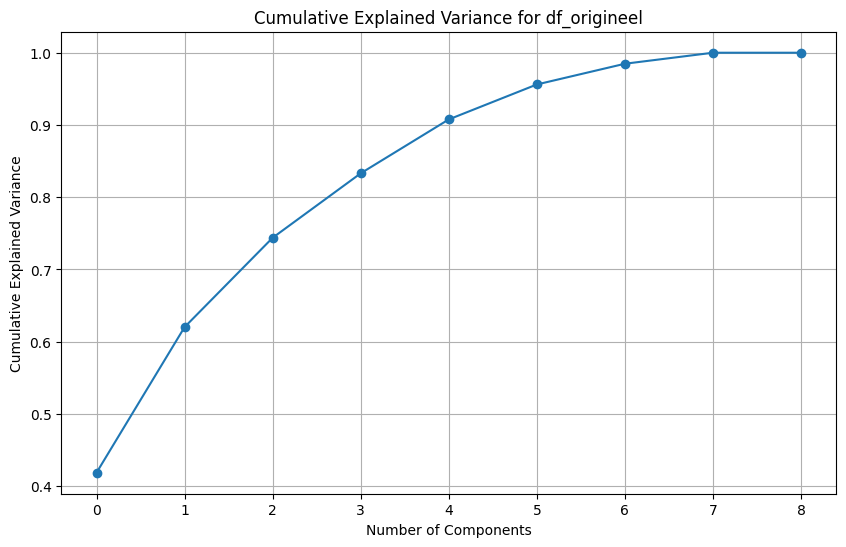

In [ ]:
# Run PCA op df_origineel (oude, originele dataset)
pca_df_origineel, cumulative_variance_origineel, n_components_origineel, scaled_data_origineel, pca_result_origineel = process_pca(df_origineel)

if pca_df_origineel is not None:
    print(pca_df_origineel.head())
    print(f'Number of components selected for df_origineel: {n_components_origineel}')

    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_variance_origineel, marker='o')
    plt.title('Cumulative Explained Variance for df_origineel')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -1.558345  0.219992 -1.699487  1.034028 -0.818493  0.458453 -0.197266   
1 -0.324231 -0.143603 -1.458606  1.215567 -0.736953  0.126157 -0.397655   
2  3.412663  0.102221 -1.023094  1.696386 -0.239372  0.107598 -0.109303   
3  3.099749 -1.535567 -0.798228  2.113718 -0.877882  0.327249  0.404277   
4 -0.555157 -0.390641  0.683701  0.878885 -0.633814  0.542171 -0.091150   

       PCA8  
0  0.225274  
1  0.129266  
2 -0.067275  
3  0.063234  
4  0.115448  
Number of components selected for df: 8


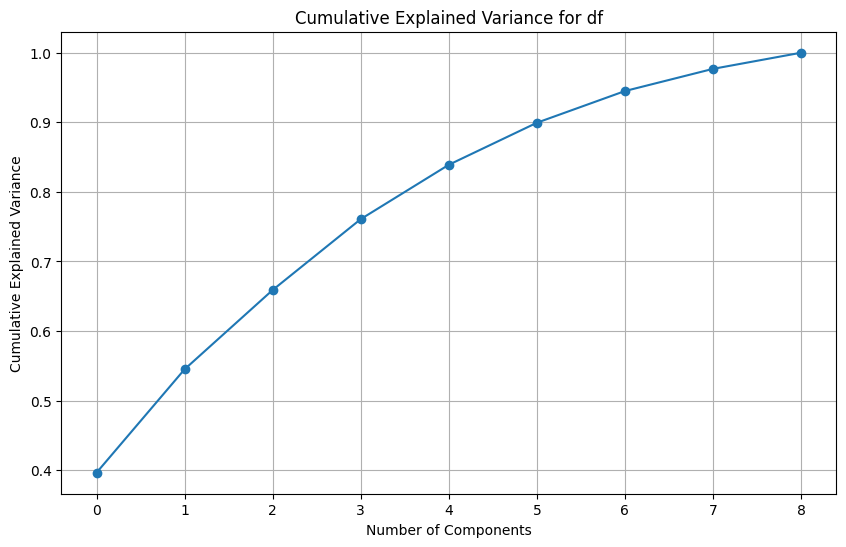

In [ ]:
# Run PCA op df (grotere dataset)
df_no_zeros = df.loc[~(df == 0).all(axis=1)]
df_no_missing = df_no_zeros.dropna()

if df_no_missing.shape[0] == 0:
    print("All arrays were empty. No valid data left.")
else:
    attributen = ['attack', 'sp_attack', 'defense', 'sp_defense', 'speed', 'hp', 'height_m', 'weight_kg', 'percentage_male']
    df_numerical = df_no_missing[attributen]

    # Zorg ervoor dat je de juiste DataFrame doorgeeft aan de process_pca functie
    pca_df, cumulative_variance, n_components, scaled_data, pca_result = process_pca(df_numerical)

    if pca_df is not None:
        print(pca_df.head())
        print(f'Number of components selected for df: {n_components}')

        plt.figure(figsize=(10, 6))
        plt.plot(cumulative_variance, marker='o')
        plt.title('Cumulative Explained Variance for df')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.grid(True)
        plt.show()

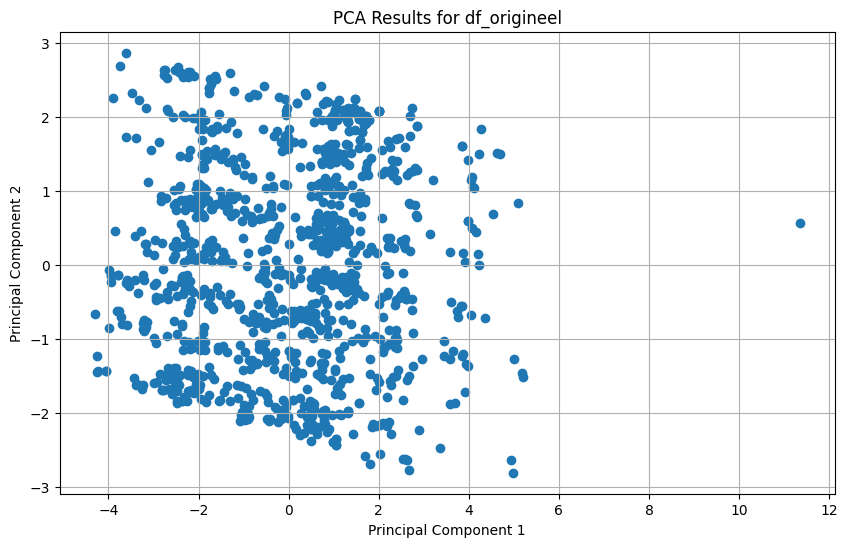

In [ ]:
if n_components_origineel >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_df_origineel['PCA1'], pca_df_origineel['PCA2'])
    plt.title('PCA Results for df_origineel')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()



> De code hieronder gaat over de grotere, nieuwe dataset en bevat informatie over het percentage mannelijke pokémon, hoogte en gewicht van pokémon. Er waren enkele problemen met de data preparatie van dataset 2, vandaar dat de code er lichtelijk anders uitziet. Deze problemen waren veroorzaakt door lege kolommen binnen de aangegeven attributen



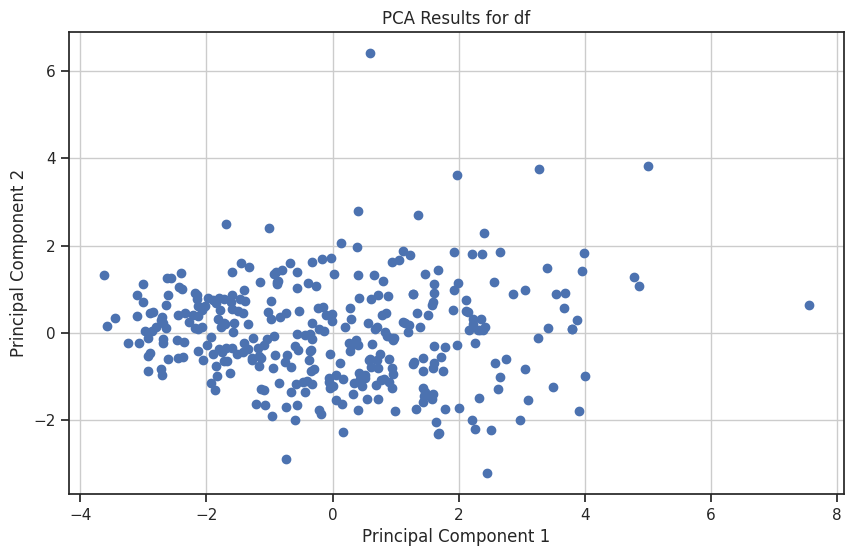

In [ ]:
if n_components >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
    plt.title('PCA Results for df')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

In [ ]:
# Unit tests
class TestPCA(unittest.TestCase):
    def setUp(self):
        self.df_no_outliers_origineel = df_origineel.select_dtypes(include=['float64', 'int64'])
        self.df_no_outliers = df_numerical

    def test_no_outliers_origineel(self):
        z_scores_origineel = np.abs(zscore(self.df_no_outliers_origineel))
        df_no_outliers_origineel = self.df_no_outliers_origineel[(z_scores_origineel < 7).all(axis=1)]
        self.assertFalse(df_no_outliers_origineel.empty, "All rows are considered outliers for df_origineel with the current threshold.")

    def test_n_components_origineel(self):
        pca_df_origineel, _, n_components_origineel, _, _ = process_pca(df_origineel)
        self.assertGreaterEqual(n_components_origineel, 1, "Number of components should be at least 1 for df_origineel.")

    def test_pca_shape_origineel(self):
        pca_df_origineel, _, n_components_origineel, _, _ = process_pca(df_origineel)
        self.assertEqual(pca_df_origineel.shape[1], n_components_origineel, "PCA result should have the correct number of components for df_origineel.")

    def test_scaled_data_origineel(self):
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(self.df_no_outliers_origineel)
        self.assertAlmostEqual(np.mean(scaled_data), 0, places=5, msg="Scaled data mean should be close to 0 for df_origineel.")
        self.assertAlmostEqual(np.std(scaled_data), 1, places=5, msg="Scaled data standard deviation should be close to 1 for df_origineel.")

    def test_no_outliers(self):
        z_scores = np.abs(zscore(self.df_no_outliers))
        df_no_outliers = self.df_no_outliers[(z_scores < 7).all(axis=1)]
        self.assertFalse(df_no_outliers.empty, "All rows are considered outliers with the current threshold.")

    def test_n_components(self):
        pca_df, _, n_components, _, _ = process_pca(df_numerical)
        self.assertGreaterEqual(n_components, 1, "Number of components should be at least 1.")

    def test_pca_shape(self):
        pca_df, _, n_components, _, _ = process_pca(df_numerical)
        self.assertEqual(pca_df.shape[1], n_components, "PCA result should have the correct number of components.")

    def test_scaled_data(self):
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(self.df_no_outliers)
        self.assertAlmostEqual(np.mean(scaled_data), 0, places=5, msg="Scaled data mean should be close to 0.")
        self.assertAlmostEqual(np.std(scaled_data), 1, places=5, msg="Scaled data standard deviation should be close to 1.")

# Run the tests
unittest.main(argv=[''], verbosity=2, exit=False)

test_n_components (__main__.TestPCA) ... ok
test_n_components_origineel (__main__.TestPCA) ... ok
test_no_outliers (__main__.TestPCA) ... ok
test_no_outliers_origineel (__main__.TestPCA) ... ok
test_pca_shape (__main__.TestPCA) ... ok
test_pca_shape_origineel (__main__.TestPCA) ... ok
test_scaled_data (__main__.TestPCA) ... ok
test_scaled_data_origineel (__main__.TestPCA) ... ok

----------------------------------------------------------------------
Ran 8 tests in 0.160s

OK


Om het even terug te nemen naar de matrix van dataset 1, wordt de matrix weer op de originele manier weergegeven mét de speciale uitlijning voor "legendary". De legendary status wordt gebruikt in PI7 deel 1 notebook voor de logistic regression, deze matrix dient ter visualisatie.

In [ ]:
# Plot de pairplot met 'legendary' als kleur
sns.set_theme(style="ticks")
sns.pairplot(df_origineel, hue='legendary')
plt.show()

Vervolgens zijn nog twee codeblocks uit het Jupyter Notebook van discussiecollege 2 toegepast om het verschil tussen de originele data, de gestandaardiseerde data en de PCA data te onderscheiden. De code is aangepast op de trainingsdata, maar de code zelf is dus van het discussiecollege 2.

Als voorbeeld zijn de stats van sp_attack en sp_defense gepakt.

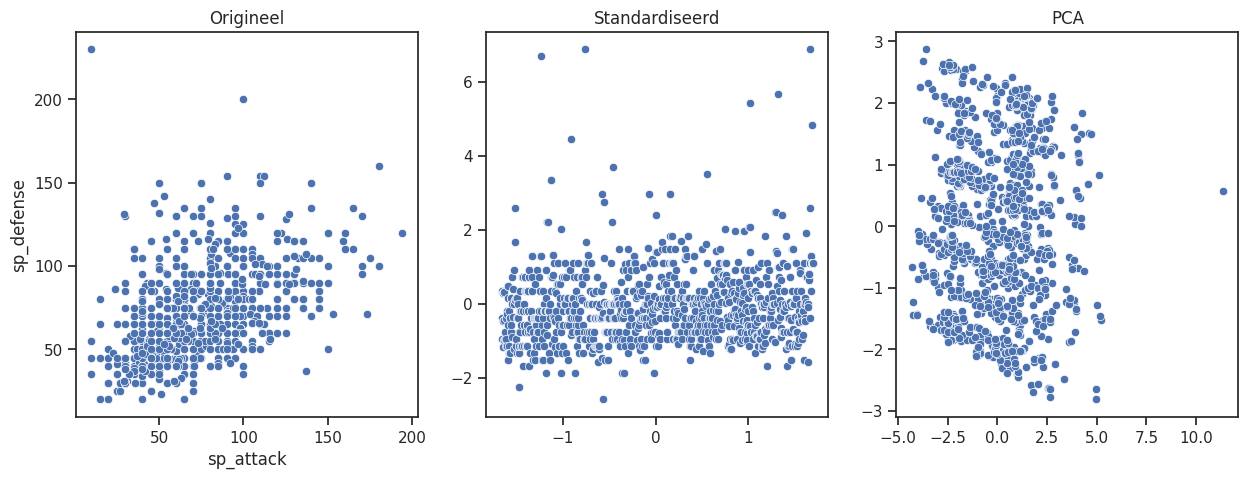

In [ ]:
# Visualiseren van de originele, genormaliseerde en PCA getransformeerde data
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Voor visualisatie selecteren we 'attack' en 'defense' als voorbeeld
sns.scatterplot(ax=axes[0], x=df['sp_attack'], y=df['sp_defense'])
axes[0].set_title('Origineel')

sns.scatterplot(ax=axes[1], x=scaled_data_origineel[:, 0], y=scaled_data_origineel[:, 2])
axes[1].set_title('Standardiseerd')

sns.scatterplot(ax=axes[2], x=pca_result_origineel[:, 0], y=pca_result_origineel[:, 1])
axes[2].set_title('PCA')

plt.show()

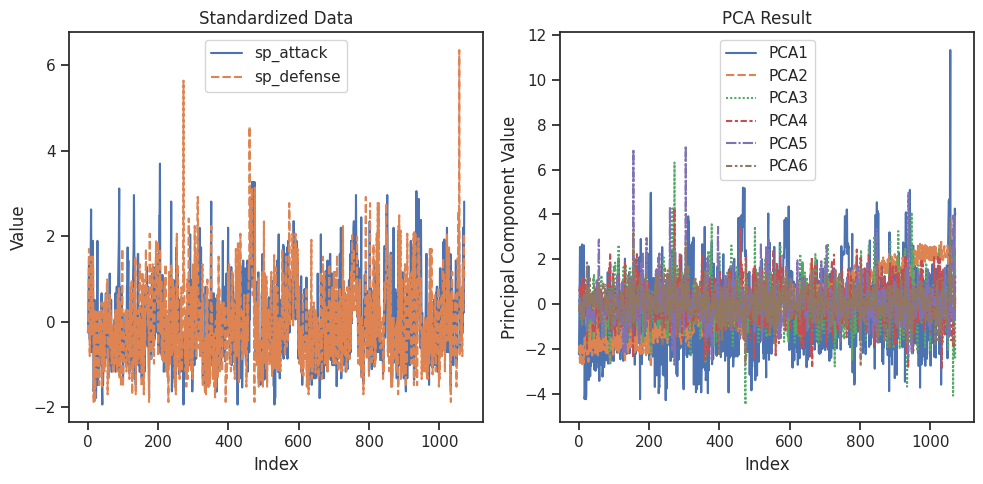

In [ ]:
# Extra visualisatie van genormaliseerde data met lijnplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gebruikt genormaliseerde data en PCA resultaten
std_df = pd.DataFrame(scaled_data_origineel, columns=df_origineel.select_dtypes(include=['float64', 'int64']).columns)
pca_df = pd.DataFrame(pca_result_origineel, columns=[f"PCA{i+1}" for i in range(n_components_origineel)])

# Lijnplot van twee genormaliseerde kolommen
sns.lineplot(ax=axes[0], data=std_df[['sp_attack', 'sp_defense']])
axes[0].set_title('Standardized Data')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')

# Lijnplot van PCA resultaten
sns.lineplot(ax=axes[1], data=pca_df)
axes[1].set_title('PCA Result')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Principal Component Value')

plt.tight_layout()
plt.show()

> Tijdens het implementeren van de diverse methoden zullen PCA1 en PCA2 het meest gebruikt worden. PCA1 en PCA2 zijn de eerste twee hoofdcomponenten na het toepassen van Principal Component Analysis (PCA) op een dataset. PCA1 is de richting van de grootste variatie in de data, wat betekent dat het de combinatie van oorspronkelijke variabelen is die het meeste verschil in de data verklaart. PCA2 is de richting van de op een na grootste variatie, orthogonaal aan PCA1, wat betekent dat het de tweede meest significante combinatie van variabelen is. Samen helpen deze componenten bij het reduceren van de dimensies van de dataset terwijl ze de meeste informatie behouden.

Ten slotte is er nog extra visualisatie naar de verschillende PCA's voor beide datasets uitgevoerd en een clusteranalyse per dataset voor de PCA"s.



> Onderstaande codeblock is ter visualisatie van de PCA-componenten van df_origineel (dataset ingeleverd op inlevermoment 1)



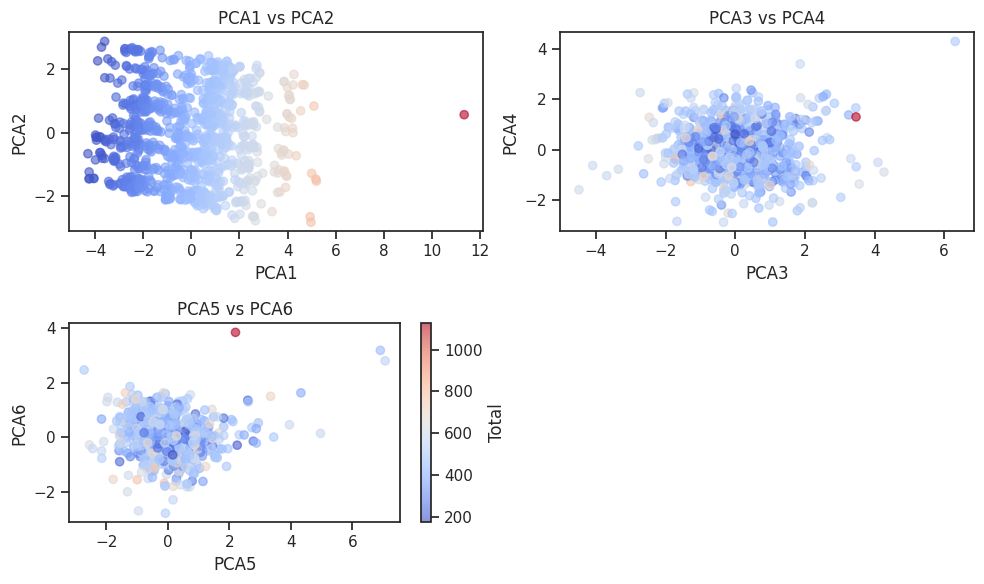

In [ ]:
# Controleer of 'total' kolom bestaat in df_origineel
if 'total' in df_origineel.columns:
    total_origineel = df_origineel['total']
else:
    raise ValueError("De kolom 'total' bestaat niet in df_origineel")

# Visualiseer de eerste paar PCA-componenten
plt.figure(figsize=(10, 6))

# PCA1 vs PCA2
plt.subplot(2, 2, 1)
plt.scatter(pca_df_origineel['PCA1'], pca_df_origineel['PCA2'], c=total_origineel, cmap='coolwarm', alpha=0.6)
plt.title('PCA1 vs PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# PCA3 vs PCA4
plt.subplot(2, 2, 2)
plt.scatter(pca_df_origineel['PCA3'], pca_df_origineel['PCA4'], c=total_origineel, cmap='coolwarm', alpha=0.6)
plt.title('PCA3 vs PCA4')
plt.xlabel('PCA3')
plt.ylabel('PCA4')

# PCA5 vs PCA6
plt.subplot(2, 2, 3)
plt.scatter(pca_df_origineel['PCA5'], pca_df_origineel['PCA6'], c=total_origineel, cmap='coolwarm', alpha=0.6)
plt.title('PCA5 vs PCA6')
plt.xlabel('PCA5')
plt.ylabel('PCA6')

plt.tight_layout()
plt.colorbar(label='Total')
plt.show()



> Onderstaande code is om een clusteranalyse uit te voeren van van de PCA-componenten van df_origineel



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


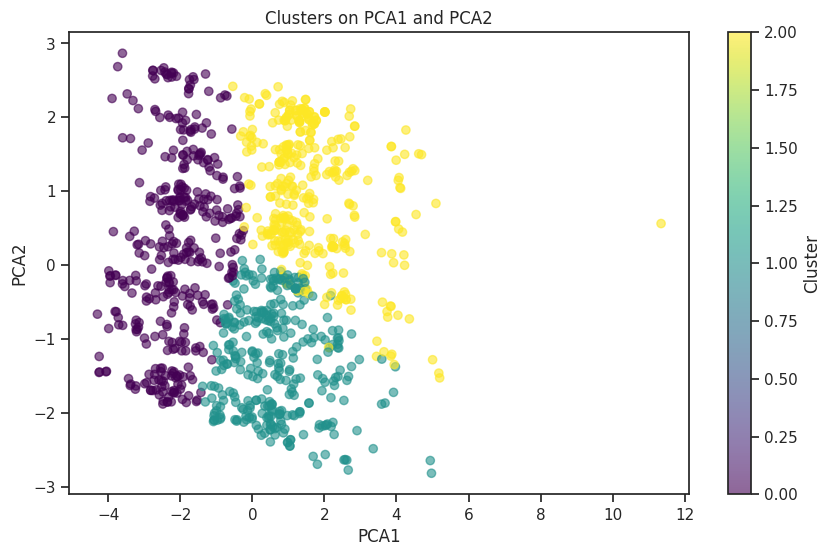

In [ ]:
# Aantal clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(pca_df_origineel[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']])

# Voeg cluster labels toe aan DataFrame
pca_df_origineel['Cluster'] = clusters

# Visualiseer clusters met PCA1 en PCA2
plt.figure(figsize=(10, 6))
plt.scatter(pca_df_origineel['PCA1'], pca_df_origineel['PCA2'], c=pca_df_origineel['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters on PCA1 and PCA2')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(label='Cluster')
plt.show()



> Een clusteranalyse dat meer uitziet zoals de clusteranalyse uit het Jupyter Notebook van discussiecollege week 4:



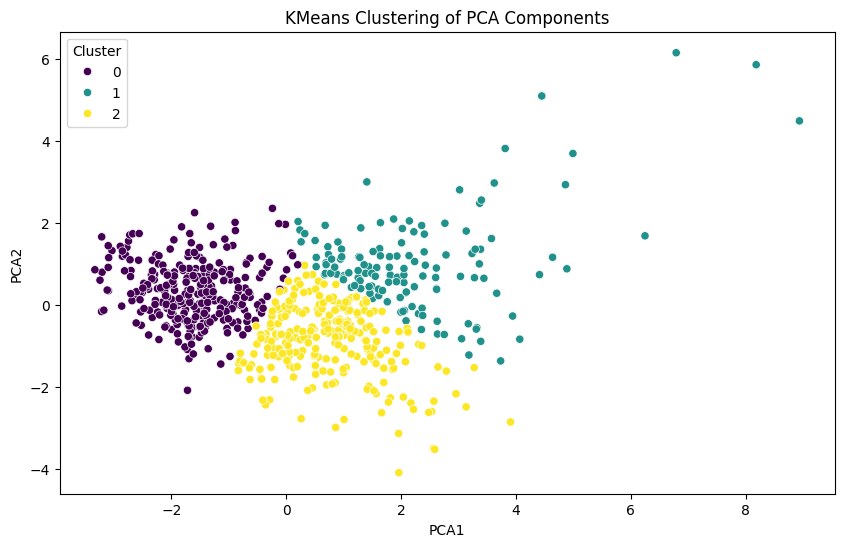

In [ ]:
# Definieer de attributen die we willen gebruiken voor PCA
attributen = ['attack', 'sp_attack', 'defense', 'sp_defense', 'speed', 'hp', 'height_m', 'weight_kg', 'percentage_male']

# Verwijder rijen met ontbrekende waarden
df_no_missing = df.dropna(subset=attributen)

# Haal de numerieke data
df_numerical = df_no_missing[attributen]

# Standaardiseer de data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Voer PCA uit om de eerste twee componenten te verkrijgen
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Pas KMeans clustering toe
kmeans = KMeans(n_clusters=3, n_init='auto').fit(df_pca)
y_pred = kmeans.predict(df_pca)

# Visualiseer de clustering resultaten
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca['PCA1'], y=df_pca['PCA2'], hue=y_pred, palette='viridis')
plt.title('KMeans Clustering of PCA Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

Tijdens het implementeren van diverse methoden voor PI7 van Data Science zal vaak de voorkeur worden gegeven aan het gebruik van PCA1 en PCA2 boven bijvoorbeeld PCA6 of PCA8. Dit heeft verschillende redenen die te maken hebben met de eigenschappen van Principal Component Analysis (PCA) en de manier waarop het werkt:


1.   Maximale Variatie: PCA1 en PCA2 zijn de eerste twee hoofdcomponenten na het toepassen van PCA op een dataset. PCA1 is de richting van de grootste variatie in de data. Dit betekent dat PCA1 de combinatie van oorspronkelijke variabelen is die het meeste verschil in de data verklaart. PCA2 is de richting van de op een na grootste variatie, orthogonaal aan PCA1, en vertegenwoordigt de tweede meest significante combinatie van variabelen. Samen bevatten deze twee componenten de meeste informatie en variatie uit de oorspronkelijke dataset.
2.   Dimensiereductie: Een van de primaire doelen van PCA is dimensiereductie. Door de dataset te reduceren tot de eerste paar hoofdcomponenten (meestal PCA1 en PCA2), kunnen we de complexiteit van de data verlagen zonder significant verlies van informatie. PCA1 en PCA2 bevatten doorgaans de meeste informatie, waardoor we een eenvoudiger model kunnen bouwen dat nog steeds de kernpatronen en variaties in de data weergeeft.
3. Visualisatie: Voor visualisatiedoeleinden zijn PCA1 en PCA2 bijzonder nuttig. Door de data te plotten in de ruimte van de eerste twee hoofdcomponenten, kunnen we de structurele patronen en clusters in de data visueel interpreteren. Dit is veel moeilijker te bereiken met hogere componenten zoals PCA6 of PCA8, omdat deze minder variatie bevatten en daardoor minder representatief zijn voor de data.
4. Vermindering van Ruis: Hogere hoofdcomponenten (zoals PCA6 of PCA8) bevatten vaak meer ruis dan informatie. Dit komt omdat deze componenten de kleinere variaties in de data vertegenwoordigen, die minder belangrijk kunnen zijn voor het onderliggende patroon of de structuur van de dataset. Door de focus te leggen op PCA1 en PCA2, kunnen we de ruis verminderen en de signaal-ruisverhouding verbeteren.
5. Efficiëntie: Het gebruik van de eerste twee componenten is computationeel efficiënter. Modellen die zijn gebaseerd op minder componenten zijn eenvoudiger en sneller te trainen en te evalueren. Dit maakt het praktischer om PCA1 en PCA2 te gebruiken, vooral bij grote datasets of bij real-time toepassingen.
6. Interpreerbaarheid: De eerste twee componenten zijn vaak beter te interpreteren in termen van de oorspronkelijke variabelen. Omdat PCA1 en PCA2 de meeste variatie en informatie bevatten, kunnen we makkelijker de invloed van oorspronkelijke variabelen op deze componenten begrijpen en analyseren. Hogere componenten, zoals PCA6 of PCA8, zijn vaak moeilijker te interpreteren en bieden minder inzicht in de onderliggende data-structuur.

##Conclusie:
PCA1 en PCA2 worden vaker gebruikt in plaats van hogere componenten zoals PCA6 of PCA8 omdat ze de meeste variatie en informatie uit de oorspronkelijke dataset bevatten, wat leidt tot betere visualisatie, interpretatie en modellering met minder ruis en hogere efficiëntie.